In [2]:
%load_ext autoreload
%autoreload 2
import nest_asyncio
nest_asyncio.apply()

from mutabledataset import SimpleDataset
from agent import RationalAgent
from simulation import Simulation
from learner import LogisticLearner
import plot

import numpy as np
import pandas as pd


def print_table(df):
    young = plot.count_df(df, [{'group': 0, 'credit_h': 1}, {'group': 0, 'credit_h': 0}])
    young_n = young.sum()
    young = young / young.sum() * 100

    old = plot.count_df(df, [{'group': 1, 'credit_h': 1}, {'group': 1, 'credit_h': 0}])
    old_n = old.sum()
    old = old / old.sum() * 100
    tbl = pd.DataFrame(data=[young,old], index=['0 unprivileged ('+str(young_n)+')', '1 privileged ('+str(old_n)+')'], columns=['Good Credit', 'Bad Credit'])
    print("Avg grp 1: ", np.average(plot._df_selection(df, {'group':1})['x']))
    print("Avg grp 0: ", np.average(plot._df_selection(df, {'group':0})['x']))
    print("Difference: ", abs(np.average(plot._df_selection(df, {'group':1})['x']) - np.average(plot._df_selection(df, {'group':0})['x'])))
    return (tbl)

In [5]:
cost_lambda = lambda x_new, x: x_new/2.+1*abs(x_new-x)/4.
cost_fixed = lambda size: np.abs(np.random.normal(loc=0.5,size=size))

g = SimpleDataset(mutable_features=['x'],
        domains={'x': 'auto'},
        discrete=['x'],
        cost_fns={'x': cost_lambda})

sim = Simulation(g,
        RationalAgent,
        LogisticLearner(),
        cost_fixed)




# Dataset Description

In [6]:
sim.start_simulation(include_protected=True)

Train:  (1000, 2) , Test:  (1000, 2)


/home/dan/data/ETH/ba/simulation/mutabledataset.py:89: UserWarning: Use set of values present in dataset to infer domain for feature x
  warnings.warn("Use set of values present in dataset to infer domain for feature " + ft)


Accuracy (h) pre 0.9
Accuracy (h) post 0.722
Accuracy (h*) post 0.919
eps =  0.2
y=1 900.0  <-  828.0


# Simulation w/o fairness constraints

## Pre Simulation (No Aff. Action)

In [7]:
print_table(sim.dataset_df)

Avg grp 1:  0.6694269662921349
Avg grp 0:  0.5063033707865169
Difference:  0.16312359550561806


,Good Credit,Bad Credit
0 unprivileged (1000),16.7,83.3
1 privileged (1000),66.8,33.2


## Post Simulation (No Aff. Action)

group 0


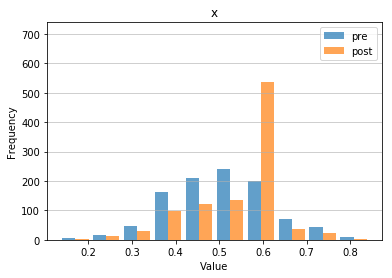

group 1


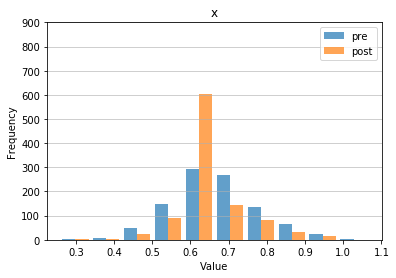

Avg grp 1:  0.6525955056179774
Avg grp 0:  0.550179775280899
Difference:  0.1024157303370784


,Good Credit,Bad Credit
0 unprivileged (1000),51.1,48.9
1 privileged (1000),81.4,18.6


In [8]:
print("group 0")
plot.plot_mutable_features(sim,selection_criteria={'group':0})
print("group 1")
plot.plot_mutable_features(sim,selection_criteria={'group':1})
print_table(sim.dataset_new_df)

# Affirmative Action

In [9]:
from learner import StatisticalParityLogisticLearner

g = SimpleDataset(mutable_features=['x'],
        domains={'x': 'auto'},
        discrete=['x'],
        cost_fns={'x': cost_lambda})

privileged_groups = [{'group': 1}]
unprivileged_groups = [{'group': 0}]

 

sim = Simulation(g,
                 RationalAgent,
                 StatisticalParityLogisticLearner(privileged_groups,
                                           unprivileged_groups, 0.001),
                 cost_fixed)

sim.start_simulation(include_protected=True)



Train:  (1000, 2) , Test:  (1000, 2)
{'group': 1}


/home/dan/data/ETH/ba/simulation/mutabledataset.py:89: UserWarning: Use set of values present in dataset to infer domain for feature x
  warnings.warn("Use set of values present in dataset to infer domain for feature " + ft)


Accuracy (h) pre 0.389
Accuracy (h) post 0.425
{'group': 1}
Accuracy (h*) post 0.438
eps =  0.01
y=1 898.0  <-  846.0


## Pre Simulation (Aff. Action)

In [10]:
print_table(sim.dataset_df)

Avg grp 1:  0.6888390804597702
Avg grp 0:  0.5117701149425288
Difference:  0.17706896551724138


,Good Credit,Bad Credit
0 unprivileged (1000),73.5,26.5
1 privileged (1000),68.4,31.6


## Post Simulation (Aff. Action)

group 0


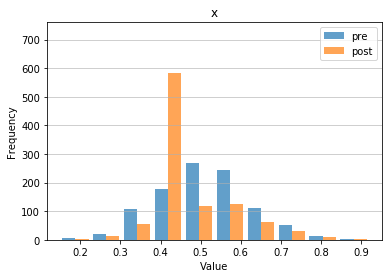

group 1


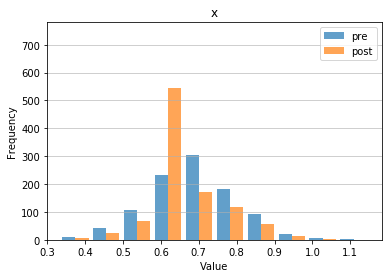

Avg grp 1:  0.6696206896551724
Avg grp 0:  0.4839425287356321
Difference:  0.1856781609195403


,Good Credit,Bad Credit
0 unprivileged (1000),86.5,13.5
1 privileged (1000),81.5,18.5


In [11]:
print("group 0")
plot.plot_mutable_features(sim,selection_criteria={'group':0})
print("group 1")
plot.plot_mutable_features(sim,selection_criteria={'group':1})
print_table(sim.dataset_new_df)

# EqOdds

In [12]:
from learner import EqOddsPostprocessingLogisticLearner

g = SimpleDataset(mutable_features=['x'],
        domains={'x': 'auto'},
        discrete=['x'],
        cost_fns={'x': cost_lambda})

privileged_groups = [{'group': 1}]
unprivileged_groups = [{'group': 0}]

sim = Simulation(g,
                 RationalAgent,
                 EqOddsPostprocessingLogisticLearner(privileged_groups = privileged_groups,
                          unprivileged_groups = unprivileged_groups),
                 cost_fixed)
print(sim.dataset.unfavorable_label)
sim.start_simulation(include_protected=True)

0.0
Train:  (1000, 2) , Test:  (1000, 2)


/home/dan/data/ETH/ba/simulation/mutabledataset.py:89: UserWarning: Use set of values present in dataset to infer domain for feature x
  warnings.warn("Use set of values present in dataset to infer domain for feature " + ft)


Accuracy (h) pre 0.155
Accuracy (h) post 0.381
Accuracy (h*) post 0.538
eps =  0.16
y=1 1394.0  <-  864.0


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


## Pre Simulation (EqOdds)

In [12]:
print_table(sim.dataset_df)

Avg grp 1:  0.6263789473684211
Avg grp 0:  0.4739052631578948
Difference:  0.15247368421052637


,Good Credit,Bad Credit
0 unprivileged (1000),17.1,82.9
1 privileged (1000),17.5,82.5


# 